<a href="https://colab.research.google.com/github/Chandrashekar0123/Age-and-Gender-Prediction/blob/main/Age_and_Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Age and Gender Detection

# CNN Model (Age and Gender Detection)


This is the notebook for model in age gender detector. Here, we will extract the data ,train it and fit it into our model, and will evaluate our results and optimize the model for better result.

Here I'm running the program in Google Colab, That is imported from Kaggle

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jangedoo_utkface_new_path = kagglehub.dataset_download('jangedoo/utkface-new')

print('Data source import complete.')

100%|██████████| 331M/331M [00:02<00:00, 151MB/s]

Extracting files...


Data source import complete.


## Import all the Necessary Libraries

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

##To know the path of the Dataset

In [ ]:
import os

# Get the absolute path to the downloaded dataset directory
dataset_path = os.path.abspath(jangedoo_utkface_new_path)

# Print the path
print(dataset_path)

/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1


#To view Images that consists in the Dataset

In [ ]:
import os

def find_image_paths(root_dir):
    image_paths = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.bmp')):  # Adjust extensions as needed
                image_path = os.path.join(root, file)
                image_paths.append(image_path)
    return image_paths

# Replace with the actual root directory path
root_dir = "/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1"

image_paths = find_image_paths(root_dir)

# Print the image paths
for path in image_paths:
    print(path)

Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/24_1_4_20170103223907208.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/43_1_3_20170109142242047.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/22_0_0_20170104002331117.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/37_1_0_20170109142928166.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/2_0_2_20161219151454787.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/29_1_4_20170105171748652.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/12_1_0_20170104012017177.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/crop_part1/11_1_0_20170109204123358.jpg.chip.jpg
/root/.cache/kagglehub/datasets/jangedoo/utkfa

## Extracting data from the dataset

If data has not been downloaded yet, download it from [Here](https://www.kaggle.com/jangedoo/utkface-new)

In [ ]:
fldr="/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1"

In [ ]:
import os
flies=os.listdir(fldr)

## Create List of images from the dataset

## Create List of Age and Gender from the dataset

In [ ]:
import cv2
import os

# Path to the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace"

ages = []
genders = []
images = []

# Loop through all files in the dataset directory
for fle in os.listdir(dataset_path):
    try:
        # Construct the full path
        full_path = os.path.join(dataset_path, fle)

        # Check if the file is an image
        if not fle.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Skipping non-image file: {fle}")
            continue

        # Split the filename with '_'
        parts = fle.split('_')

        # Validate the filename format
        if len(parts) < 2 or not parts[0].isdigit() or not parts[1].isdigit():
            print(f"Invalid filename format: {fle}")
            continue

        # Extract age and gender
        age = int(parts[0])  # First part is age
        gender = int(parts[1])  # Second part is gender

        # Print the full path of the image before reading
        total = os.path.join(dataset_path, fle)
        print(f"Processing image: {total}")

        # Read and process the image
        image = cv2.imread(total)
        if image is None:
            print(f"Failed to read image: {total}")
            continue

        # Convert image to RGB and resize to 48x48
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (48, 48))

        # Append to the respective lists
        ages.append(age)
        genders.append(gender)
        images.append(image)

    except Exception as e:
        print(f"Error processing file {fle}: {str(e)}")

# Output some details
print(f"Processed {len(images)} images.")

Streaming output truncated to the last 5000 lines.
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/68_0_0_20170117171135900.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/70_1_0_20170120223616646.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/26_1_2_20170116180343830.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/62_0_0_20170120223836366.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/26_0_0_20170119172232809.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/27_1_0_20170111182452802.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/34_1_3_20170119163642029.jpg.chip.jpg
Processing image: /root/.cache/kagglehub/datasets/jan

## Viewing a sample

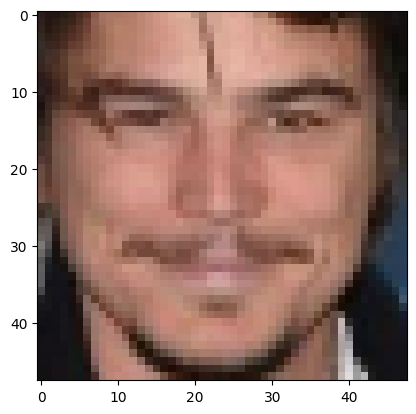

In [ ]:
plt.imshow(images[24])

In [ ]:
print(ages[24])

40


In [ ]:
print(genders[24])

0


## Saving images array,ages array, and genders array in the system

In [ ]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [ ]:
ages_f

array([40, 35,  8, ..., 69, 56, 12])

## Finding the number of Male and Female samples respectively

In [ ]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Plotting the Number of Male and Female Samples

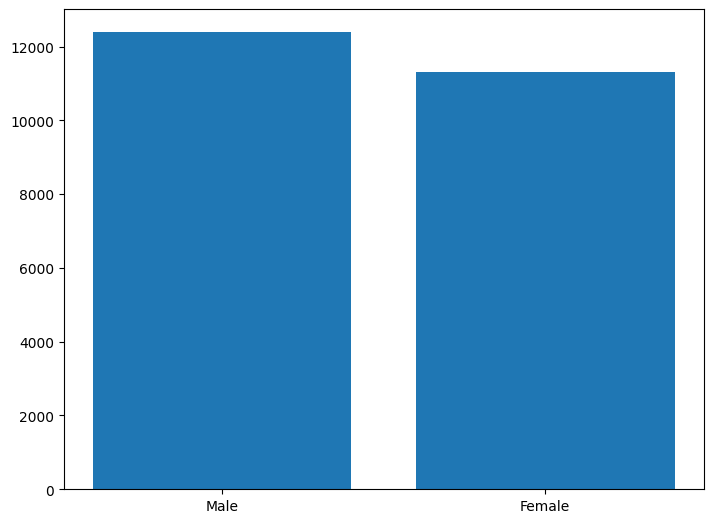

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

## Finding The number of samples in each age

In [ ]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Converting Age counts to lists

In [ ]:
val=values.tolist()
cnt=counts.tolist()

## Plotting The Samples according to the Age

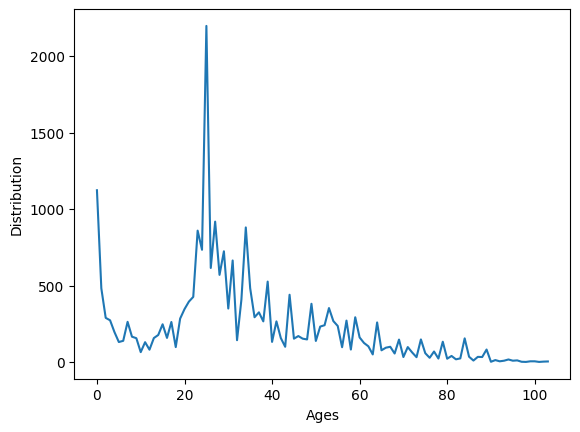

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'counts' is your data array
plt.plot(counts)
plt.xlabel('Ages')  # Label for the x-axis
plt.ylabel('Distribution')  # Label for the y-axis
plt.show()


## Definig Labes for Output

In [ ]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## Creating another list of images from existing one

### For better learning

In [ ]:
images_f_2=images_f/255

In [ ]:
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
labels_f=np.array(labels)  # For binary classification, reshape the target if needed

In [ ]:
labels_f.shape

(23708, 2)

##Splitting the Dataset into Training and Testing Parts

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [ ]:
Y_train[0:5]

array([[ 9,  0],
       [ 5,  0],
       [34,  1],
       [52,  0],
       [ 1,  0]])

##Simplifying Y_test and y_train

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([0, 0, 1, 0, 0])

In [ ]:
Y_train_2[1][0:5]

array([ 9,  5, 34, 52,  1])

In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(17781, 2)
(5927, 2)


In [ ]:
print("Shape of Y_train_2:", Y_train.shape)


Shape of Y_train_2: (17781, 2)


In [ ]:
# Inspect the unique class labels in Y_train_2
unique_classes = np.unique(Y_train)
print("Unique classes in Y_train:", unique_classes)
print("Maximum class label:", unique_classes.max())


Unique classes in Y_train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  95  96  99 100 101 103 105 110 111 115 116]
Maximum class label: 116


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train_2:", Y_train.shape)
print("Shape of Y_test_2:", Y_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (17781, 48, 48, 3)
Shape of Y_train_2: (17781, 2)
Shape of Y_test_2: (17781, 2)
Shape of X_test: (5927, 48, 48, 3)


##Defining the Model

Here I'm using pre trained model i.e. VGG16 that consists of 16 layers (13 convolutional layers and 3 fully connected layers.)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

def model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # Load VGG16 without the top layers (exclude fully connected layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers of the base model to avoid retraining them
    for layer in base_model.layers:
        layer.trainable = False

    # Add the base model (pre-trained VGG16) to the model
    x = base_model(inputs)

    # Add Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Add custom fully connected layers
    dense_1 = Dense(64, activation='relu')(x)
    drop_1 = Dropout(0.4)(dense_1)

    dense_2 = Dense(64, activation='relu')(x)
    drop_2 = Dropout(0.2)(dense_2)

    # Output layers
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)  # Binary classification for sex
    output_2 = Dense(1, activation='linear', name='age_out')(drop_2)  # Regression for age (linear)

    # Model creation
    model = Model(inputs=inputs, outputs=[output_1, output_2])

    # Compile the model
    model.compile(
        loss=["binary_crossentropy", "mae"],  # Loss functions for gender and age
        optimizer=Adam(),
        metrics=["accuracy", "mae"]  # Separate metrics for each output
    )

    return model


#Summarizing the Model

In [ ]:
# Create the model instance using the improved model function
Model = model(input_shape=(48, 48, 3))

# Display the model summary
Model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 1, 1, 512)      │     14,714,688 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │         32,832 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │         32,832 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sex_out (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_out (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,780,482 (56.38 MB)

 Trainable params: 65,794 (257.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Initializing the Model

In [ ]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the Model

### This will take some time

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=150,callbacks=callback_list)

Epoch 1/150
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - age_out_loss: 9.5407 - age_out_mae: 9.5407 - loss: 9.7749 - sex_out_accuracy: 0.9019 - sex_out_loss: 0.2342
Epoch 1: val_loss did not improve from 10.31512
278/278 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - age_out_loss: 9.5404 - age_out_mae: 9.5404 - loss: 9.7745 - sex_out_accuracy: 0.9019 - sex_out_loss: 0.2342 - val_age_out_loss: 9.9105 - val_age_out_mae: 9.9065 - val_loss: 10.4090 - val_sex_out_accuracy: 0.8068 - val_sex_out_loss: 0.5020
Epoch 2/150
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - age_out_loss: 9.5338 - age_out_mae: 9.5338 - loss: 9.7598 - sex_out_accuracy: 0.9037 - sex_out_loss: 0.2260
Epoch 2: val_loss improved from 10.31512 to 10.31206, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - age_out_loss: 9.5339 - age_out_mae: 9.5339 - loss: 9.7599 - sex_out_accuracy: 0.9037 - sex_out_loss: 0.2261 - val_age_out_loss: 9.8304 - val_age_out_mae: 9.8251 - val_loss: 10.3121 - val_sex_out_accura

## Model Evaluation

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - age_out_loss: 9.8613 - age_out_mae: 9.8612 - loss: 10.3581 - sex_out_accuracy: 0.8090 - sex_out_loss: 0.4969


[10.315120697021484,
 0.48583123087882996,
 9.834680557250977,
 9.82730484008789,
 0.8100219368934631]

#Making Predictions

In [ ]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


In [ ]:
pred[1]

array([[24.750816],
       [36.971344],
       [47.059128],
       ...,
       [28.207378],
       [33.948524],
       [42.57538 ]], dtype=float32)

## Plotting Loss

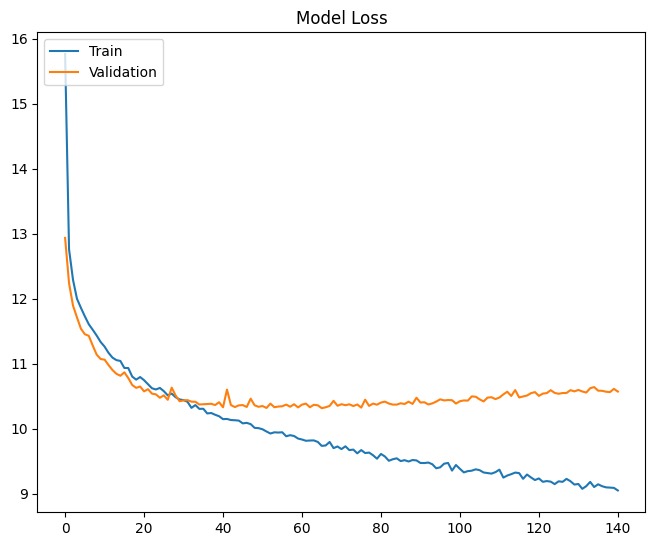

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Sex Accuracy

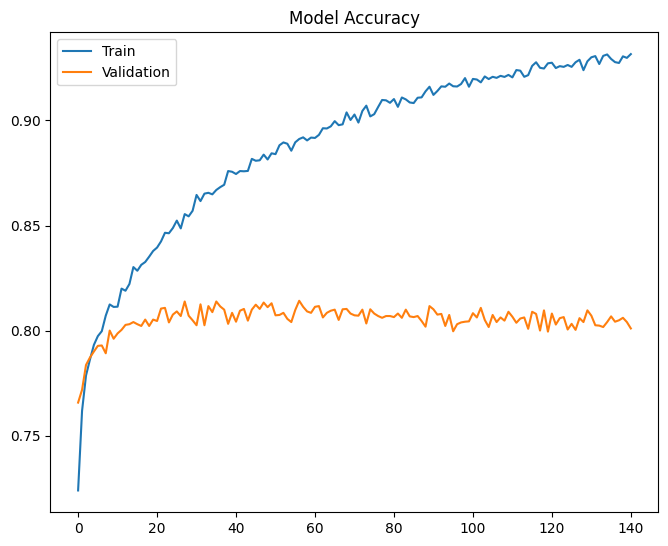

In [ ]:
plt.plot(History.history['sex_out_accuracy'])

plt.plot(History.history['val_sex_out_accuracy'])

plt.title('Model Accuracy')

plt.xlabel=('Epoch')

plt.ylabel=('Accuracy')

plt.legend(['Train','Validation'],loc='upper left')

plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

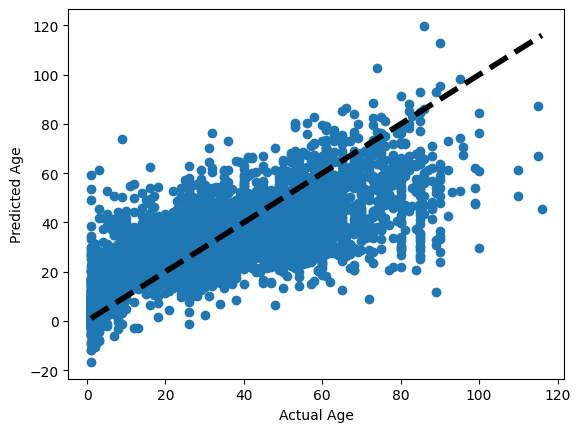

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making Report of the Model (Gender Only)

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3088
           1       0.80      0.80      0.80      2839

    accuracy                           0.81      5927
   macro avg       0.81      0.81      0.81      5927
weighted avg       0.81      0.81      0.81      5927



## Making Heatmap of the Model (Gender only)

In [ ]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

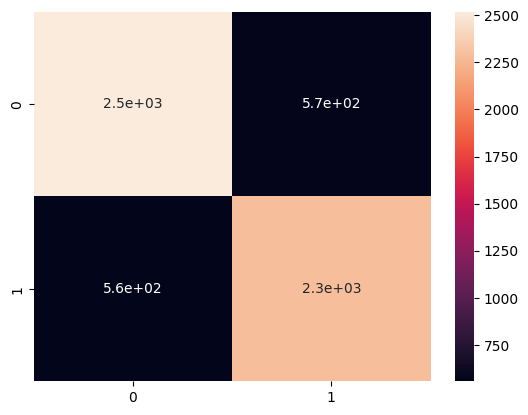

In [ ]:
import seaborn as sns

sns.heatmap(results,annot=True)

## Testing The Images Ourself

In [ ]:
def test_image(ind, images_f, images_f_2, Model):
    try:
        plt.imshow(images_f[ind])
        image_test = images_f_2[ind]
        pred_l = Model.predict(np.array([image_test]))

        # Extract scalar values properly to avoid warnings
        sex_f = ['Male', 'Female']
        age = int(np.round(pred_l[1][0]).item())  # Use .item() to extract the scalar value
        sex = int(np.round(pred_l[0][0]).item())  # Use .item() here too

        print("Predicted Age is " + str(age))
        print("Predicted Gender is " + sex_f[sex])
        print(" ")
        print(" ")
    except Exception as e:
        print(f"An error occurred: {e}")


### Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Predicted Age is 76
Predicted Gender is Male
 
 


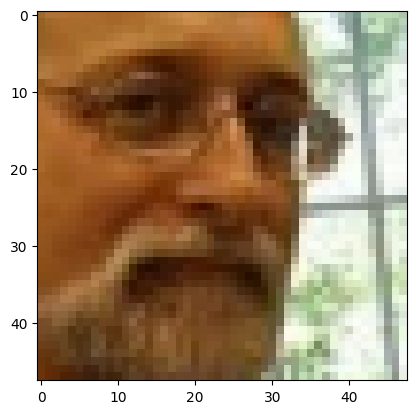

In [ ]:
test_image(54,images_f,images_f_2,Model)

### Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 22
Predicted Gender is Female
 
 


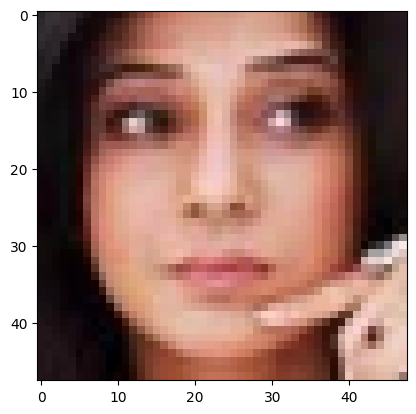

In [ ]:
test_image(2567,images_f,images_f_2,Model)

### Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 26
Predicted Gender is Female
 
 


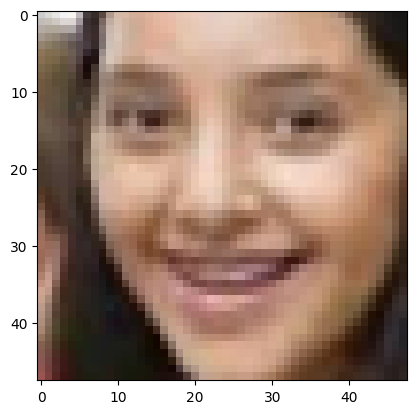

In [ ]:
test_image(925,images_f,images_f_2,Model)

### Test 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 34
Predicted Gender is Male
 
 


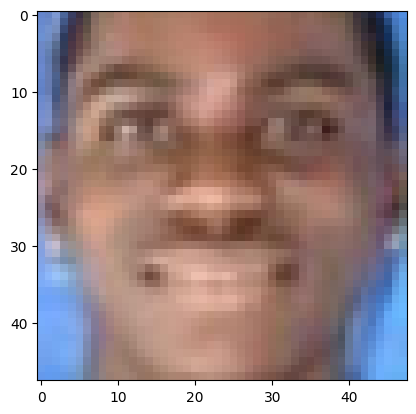

In [ ]:
test_image(291,images_f,images_f_2,Model)

### Test 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Age is 38
Predicted Gender is Male
 
 


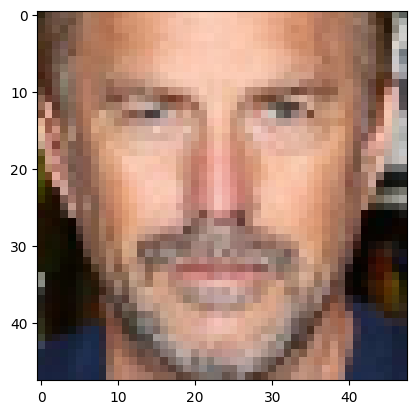

In [ ]:
test_image(9256,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Age is 39
Predicted Gender is Male
 
 


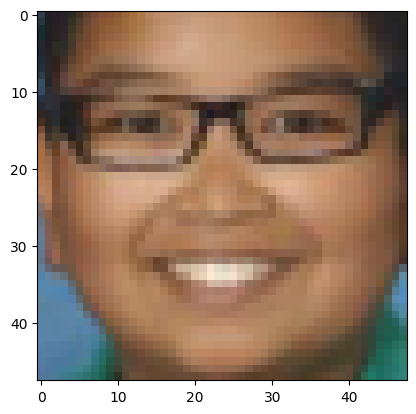

In [ ]:
test_image(56,images_f,images_f_2,Model)